## Task 1: Load and Explore the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Load the Iris dataset with error handling
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

## Step 2: Display the First Few Rows



In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [2]:
# Display the first few rows
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## Step 3: Explore the Structure



In [4]:
# Check data types and basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## Task 2: Basic Data Analysis
### Step 1: Compute Basic Statistics



In [5]:
# Compute basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### Step 2: Group by Categorical Column



In [6]:
# Group by species and compute means
grouped = df.groupby('species').mean()
print("\nMean Values by Species:")
print(grouped)


Mean Values by Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


## Task 3: Data Visualization

### Visualization 1: Line Chart



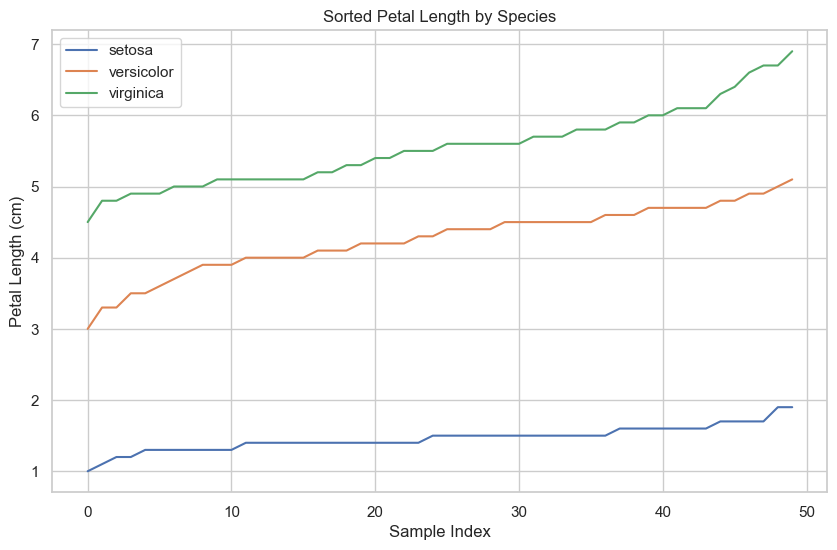

In [7]:
# Line chart: Sorted petal length by species
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    species_data = df[df['species'] == species].sort_values('petal length (cm)')
    plt.plot(range(len(species_data)), species_data['petal length (cm)'], label=species)
plt.title('Sorted Petal Length by Species')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

### Visualization 2: Bar Chart



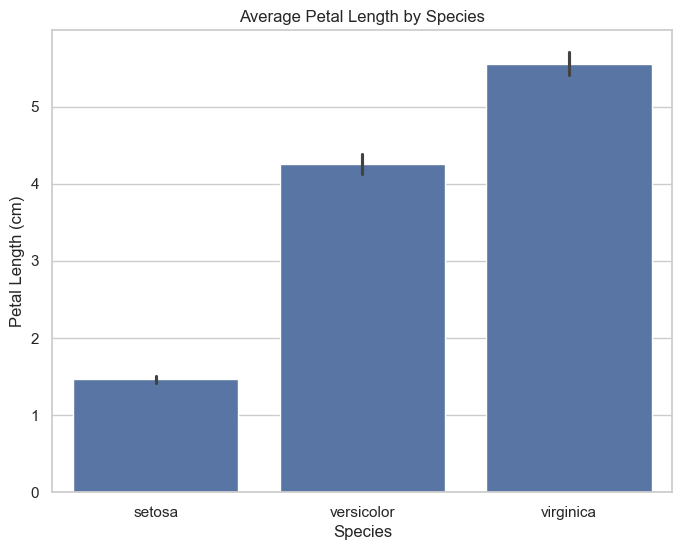

In [8]:
# Bar chart: Mean petal length by species
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal length (cm)', data=df)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

### Visualization 3: Histogram



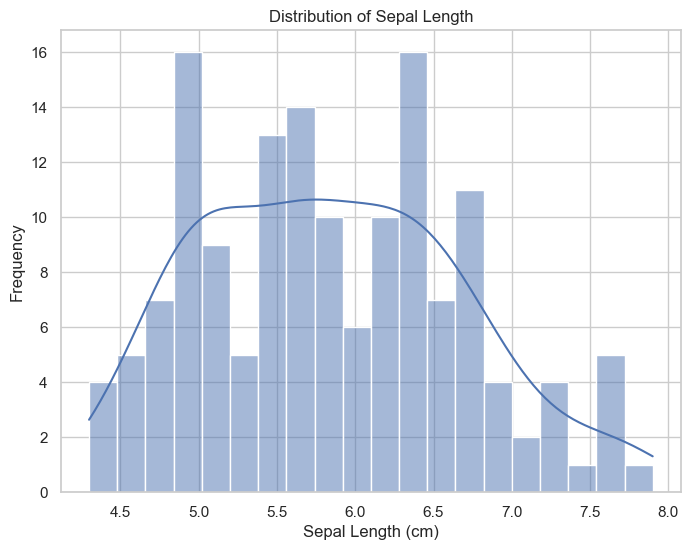

In [9]:
# Histogram: Distribution of sepal length
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal length (cm)'], bins=20, kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

### Visualization 4: Scatter Plot



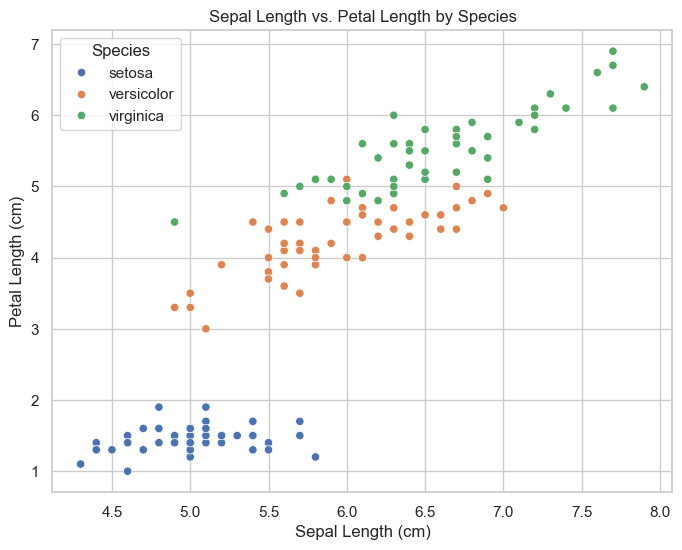

In [10]:
# Scatter plot: Sepal length vs. petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

## 3. Logistic Regression: Binary Classification
What is Logistic Regression?
Logistic regression predicts the probability of a binary outcome (e.g., 0/1, yes/no), making it a classification tool despite its name. It uses the sigmoid function to output probabilities between 0 and 1.
How It Works
•	**Formula:** p = 1 / (1 + e^(-z)), where z = mx + b.
•	**If** p > 0.5, predict 1; otherwise, predict 0.


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data and filter for two classes
X, y = load_iris(return_X_y=True)
X = X[y != 2]  # Use only classes 0 and 1
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)
print(predictions)  # Example output: [0, 1, 0, 1, ...]


[0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1]


## 4. Decision Trees: Tree-Based Models
What are Decision Trees?
Decision trees make predictions by splitting data into branches based on feature values, creating a tree-like structure of yes/no questions. They’re intuitive and easy to visualize.
**How It Works**
•	The model asks questions (e.g., "Is size > 1000 sq ft?") and follows branches to a final prediction (leaf node).


[0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1]


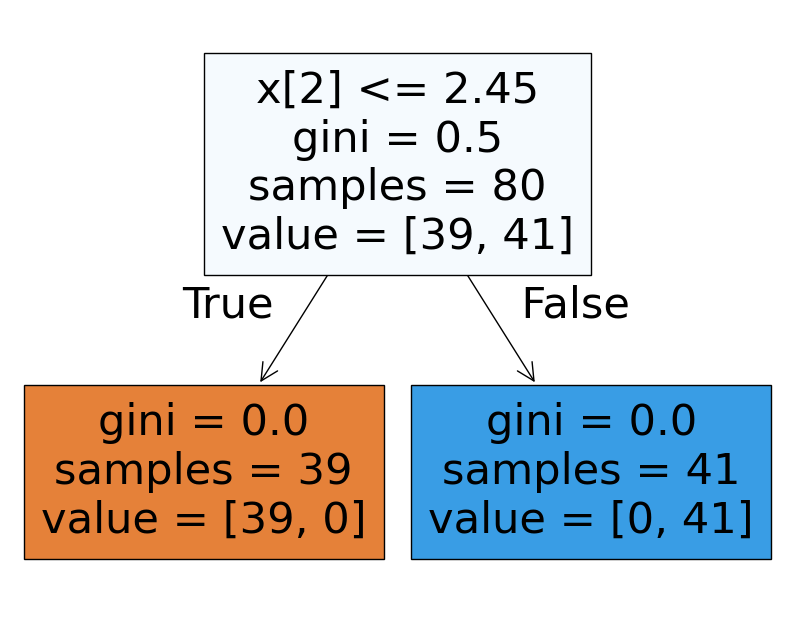

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Using Iris data from above
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

# Visualize the tree
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True)
plt.show()


**Key Points**
•	Nodes: Decision points based on features.
•	Leaves: Final predictions.
•	Use Case: Classification or regression.
•	Tip: Set max_depth to prevent overfitting (memorizing data).


## 5. Model Evaluation: Metrics and Validation
# What is Model Evaluation?
Evaluation measures how well your model performs on unseen data, ensuring it generalizes rather than overfits to the training set.
**Evaluation Metrics**
•	**For Regression:**
o	**Mean Squared Error (MSE):** Average squared difference between predictions and actual values (lower is better).
o	R-squared: Proportion of variance explained by the model (closer to 1 is better).
•	**For Classification:**
o	Accuracy: Percentage of correct predictions.
o	Precision, Recall, F1 Score: Detailed metrics for imbalanced data.
**Validation Techniques**
•	Train-Test Split: Divide data into training (e.g., 80%) and testing (e.g., 20%) sets.
•	Cross-Validation: Split data into multiple folds (e.g., 5) and average performance across them.
# Implementation in Python
1.	**Regression Metrics:**


In [3]:
from sklearn.metrics import mean_squared_error, r2_score
y_true = [3, -0.5, 2]
y_pred = [2.5, 0.0, 2]
print(mean_squared_error(y_true, y_pred))  # Example: 0.208
print(r2_score(y_true, y_pred))           # Example: 0.948


0.16666666666666666
0.9230769230769231


2.	**Classification Metrics:**

In [4]:
from sklearn.metrics import accuracy_score, classification_report
y_true = [0, 1, 1, 0]
y_pred = [0, 1, 0, 0]
print(accuracy_score(y_true, y_pred))     # Example: 0.75
print(classification_report(y_true, y_pred))


0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



3.	**Cross-Validation:**

In [5]:
from sklearn.metrics import accuracy_score, classification_report
y_true = [0, 1, 1, 0]
y_pred = [0, 1, 0, 0]
print(accuracy_score(y_true, y_pred))     # Example: 0.75
print(classification_report(y_true, y_pred))


0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



**Key Points**
•	Regression: Use MSE and R-squared to assess fit.
•	Classification: Use accuracy and additional metrics for deeper insight.
•	Validation: Always test on unseen data to detect overfitting.
